# Imports

In [70]:
import pandas as pd

import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_columns', 1000)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_colwidth', None)  #Veo hasta la última palabra

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

# Librería para MCA
import prince

# Load and Clean data

In [3]:
fallecimientos_2018 = pd.read_csv("fallecimientos_mex_2018.csv")

In [22]:
col_to_category = ['Active Situation', 'CVE_COBERT', 'CVE_ENTIDADFED', 'Event Motive (clusters)', 'Event Motive', 
                    'Event Origin', 'Gender', 'LOB2', 'Group','RFCAseg', 'Age', 'Policy', 'Event State', 'Grupos_Etarios']

for col in col_to_category:
    fallecimientos_2018[col] = fallecimientos_2018[col].astype('category')
    
fallecimientos_2018['Birth date'] = pd.to_datetime(fallecimientos_2018['Birth date'], format="%Y-%m-%d")
fallecimientos_2018['Claim Date'] = pd.to_datetime(fallecimientos_2018['Claim Date'], format="%Y-%m-%d")

In [23]:
fallecimientos_2018.dtypes

Claim_id                            int64
Policy                           category
RFCAseg                          category
TipSeguro                           int64
LOB2                             category
Age                              category
Active Situation                 category
Birth date                 datetime64[ns]
Event State                      category
Gender                           category
Event Motive                     category
Event Origin                     category
CVE_COBERT                       category
CVE_ENTIDADFED                   category
Group                            category
# Son/Daughter                      int64
# Wife/Husband                      int64
# Others                            int64
$ Total                           float64
# Beneficiaries                     int64
Claim Date                 datetime64[ns]
Event Motive (clusters)          category
Grupos_Etarios                   category
dtype: object

In [25]:
fallecimientos_2018.columns

Index(['Claim_id', 'Policy', 'RFCAseg', 'TipSeguro', 'LOB2', 'Age',
       'Active Situation', 'Birth date', 'Event State', 'Gender',
       'Event Motive', 'Event Origin', 'CVE_COBERT', 'CVE_ENTIDADFED', 'Group',
       '# Son/Daughter', '# Wife/Husband', '# Others', '$ Total',
       '# Beneficiaries', 'Claim Date', 'Event Motive (clusters)',
       'Grupos_Etarios'],
      dtype='object')

# Análisis de correlación

<Figure size 720x432 with 0 Axes>

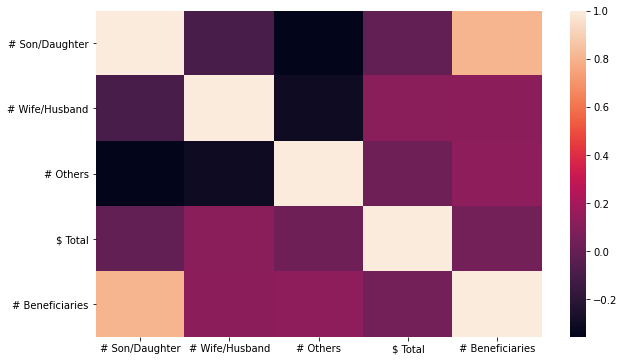

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(fallecimientos_2018.loc[:, "# Son/Daughter":].corr())
plt.show()

## Aplicación de MCA a las variables categóricas

In [27]:
aux_df = fallecimientos_2018.copy()

In [43]:
col_to_dummies = aux_df.dtypes[aux_df.dtypes == 'category'].drop([
                                            "RFCAseg", "CVE_ENTIDADFED","Event Motive (clusters)",
                                             "LOB2", "Group", "CVE_COBERT", "Policy", "Age"]).index

aux_to_mca = fallecimientos_2018[col_to_dummies]

In [45]:
col_to_dummies

Index(['Active Situation', 'Event State', 'Gender', 'Event Motive',
       'Event Origin', 'Grupos_Etarios'],
      dtype='object')

In [46]:
mca = prince.MCA(
         n_components=60,
         n_iter=3,
         copy=True,
         check_input=True,
         engine='auto',
         random_state=42
 )

In [47]:
mca

MCA(n_components=60, n_iter=3, random_state=42)

In [48]:
mca = mca.fit(aux_to_mca)

In [49]:
 mca.eigenvalues_

[0.32128249485628374,
 0.262065785921998,
 0.20807669109881796,
 0.19901087232841108,
 0.1937166772056306,
 0.19221338883151545,
 0.19017451315451953,
 0.1895160372459662,
 0.1879244301038501,
 0.1868162469154204,
 0.18647978449073266,
 0.18446024978758574,
 0.18346831783169926,
 0.18310244240811666,
 0.18195558640911347,
 0.18092278395095923,
 0.1804704579107057,
 0.17926868177043898,
 0.17887967968642673,
 0.17720219550792016,
 0.1767689757094285,
 0.17637767175469304,
 0.17622684087255955,
 0.17561355926036165,
 0.17484932669264103,
 0.17340999037050692,
 0.173080690384724,
 0.1728216404767301,
 0.17163313090818802,
 0.17065547800218994,
 0.17020859782924322,
 0.169213621769113,
 0.1684924100329121,
 0.16805591705112755,
 0.16789755753138533,
 0.16713762417287245,
 0.1669322331989188,
 0.1661420915208296,
 0.16546200862971797,
 0.1647441670281937,
 0.16446000235469074,
 0.16373289990948992,
 0.16301297476069032,
 0.16290546860593688,
 0.16189298470777091,
 0.16149035042623608,
 0.16

In [50]:
# K/J -1 Depende solo de la K: cantidad de categorías y de J: cantidad de variables.
# Es decir que no depende del contenido de la tabla, sino de su formato.
mca.total_inertia_

14.0

In [53]:
# Al igual que en PCA seleccionamos la cantidad de componentes en base a la variabilidad que queremos capturar.
print("Captured Inercia: ", round(sum(mca.explained_inertia_) * 100, 2), "%")

Captured Inercia:  75.21 %


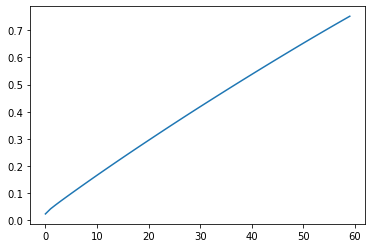

In [54]:
plt.plot(np.arange(0, len(mca.explained_inertia_), 1), np.cumsum(np.array(mca.explained_inertia_)))

**Para este caso se puede ver que la inercia capturada varía linealmente con el número de componentes. Lo que nos gustaría tener en cambio es una curva exponencial donde los primeros autovectores capturen la mayoría de esta variabilidad.**

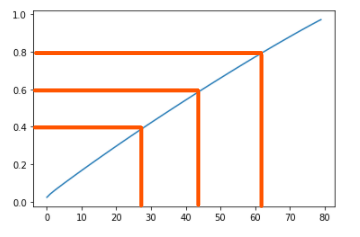

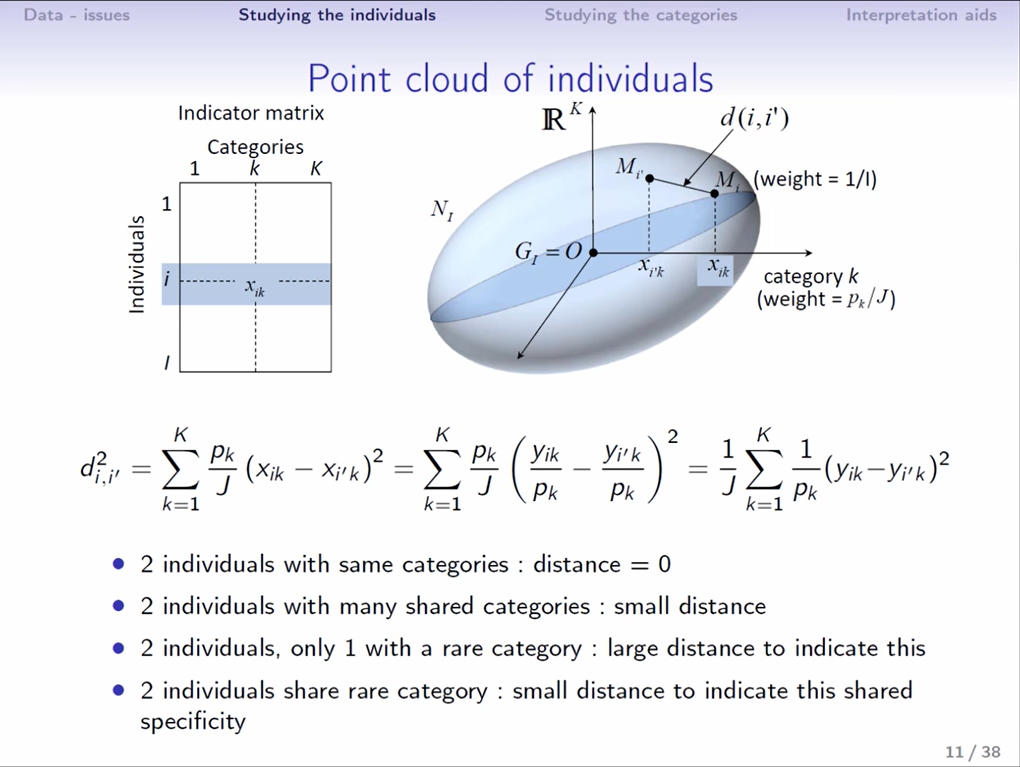

Cuantas más categorías "raras" posea el individuo, más lejos estará del origen.

Los ejes del gráfico son las direcciones ortogonales con mayor variación de inercia, es decir la dirección de los autovectores. El plano corresponde a la proyección sobre estos autoespacios.

In [55]:
np.shape(mca.U_)
np.shape(mca.V_)
np.shape(mca.eigenvalues_)

(10534, 60)

(60, 90)

(60,)

In [56]:
pd.Series(mca.col_masses_).sort_values().tail(10)

Grupos_Etarios_61-65                        0.023954
Event State_CIUDAD DE MEXICO                0.026944
Event Motive_INFARTO AGUDO DEL MIOCARDIO    0.030109
Event Origin_SIN DATOS                      0.036438
Event Motive_Other_diseases                 0.048620
Active Situation_INACTIVO                   0.065740
Gender_FEMENINO                             0.069347
Gender_MASCULINO                            0.097320
Active Situation_ACTIVO                     0.100927
Event Origin_MUERTE NATURAL                 0.122840
dtype: float64

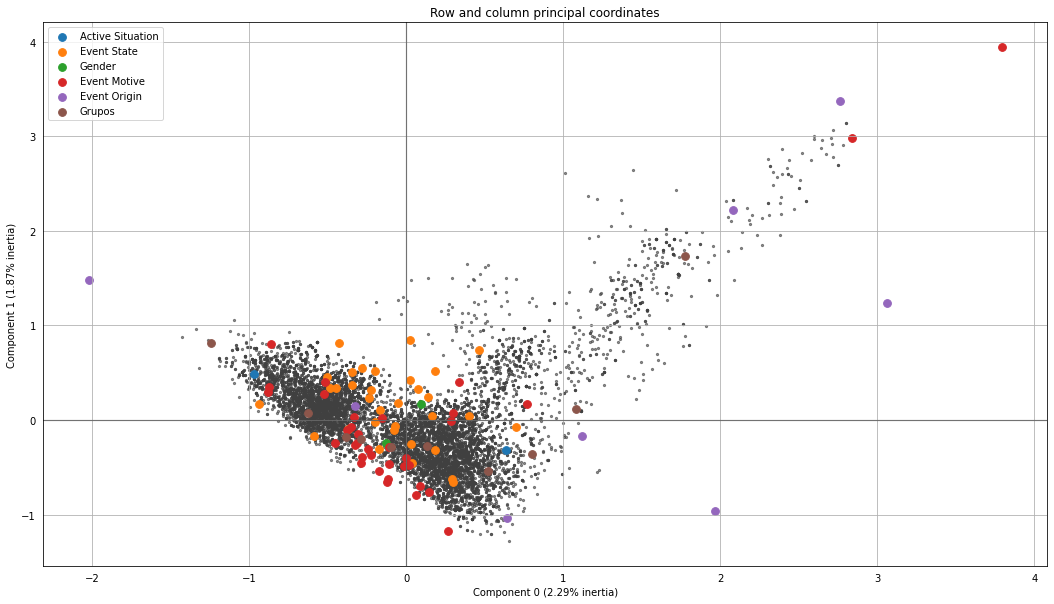

In [57]:
# individuals represented by rows
ax = mca.plot_coordinates(aux_to_mca,
         figsize=(18, 10),
         show_row_points=True,
         row_points_size=5,
         show_row_labels=False,
         show_column_points=True,
         column_points_size=60,
         show_column_labels=False,
         legend_n_cols=1)
# ax.get_figure()

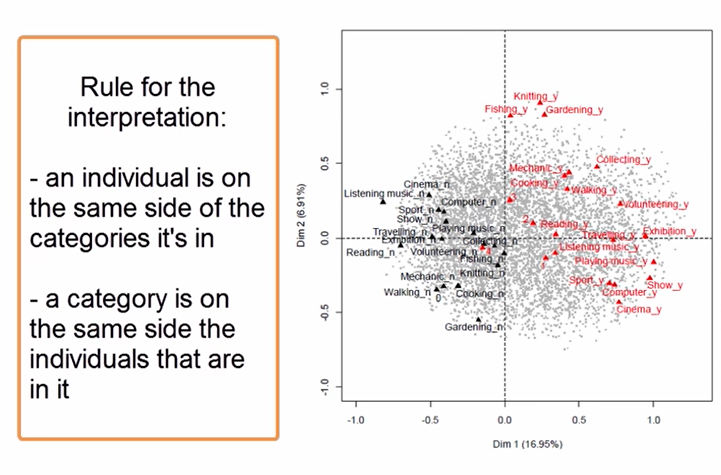

In [58]:
components = mca.transform(fallecimientos_2018[col_to_dummies])
asd = aux_to_mca.merge(components, left_index=True, right_index=True)

In [59]:
rename_columns = dict([(i, f'Component_{i}') for i in components.columns])

In [60]:
asd = asd.rename(columns=rename_columns)

In [61]:
asd.columns

Index(['Active Situation', 'Event State', 'Gender', 'Event Motive',
       'Event Origin', 'Grupos_Etarios', 'Component_0', 'Component_1',
       'Component_2', 'Component_3', 'Component_4', 'Component_5',
       'Component_6', 'Component_7', 'Component_8', 'Component_9',
       'Component_10', 'Component_11', 'Component_12', 'Component_13',
       'Component_14', 'Component_15', 'Component_16', 'Component_17',
       'Component_18', 'Component_19', 'Component_20', 'Component_21',
       'Component_22', 'Component_23', 'Component_24', 'Component_25',
       'Component_26', 'Component_27', 'Component_28', 'Component_29',
       'Component_30', 'Component_31', 'Component_32', 'Component_33',
       'Component_34', 'Component_35', 'Component_36', 'Component_37',
       'Component_38', 'Component_39', 'Component_40', 'Component_41',
       'Component_42', 'Component_43', 'Component_44', 'Component_45',
       'Component_46', 'Component_47', 'Component_48', 'Component_49',
       'Component

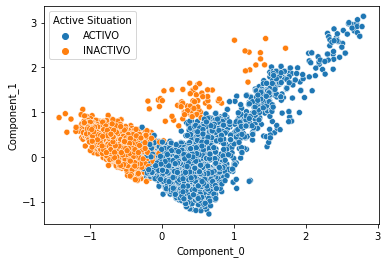

In [62]:
sns.scatterplot(x='Component_0', y='Component_1', data=asd, hue='Active Situation')

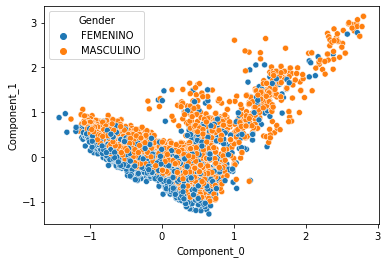

In [63]:
sns.scatterplot(x='Component_0', y='Component_1', data=asd, hue='Gender')

In [64]:
aux_df.columns

Index(['Claim_id', 'Policy', 'RFCAseg', 'TipSeguro', 'LOB2', 'Age',
       'Active Situation', 'Birth date', 'Event State', 'Gender',
       'Event Motive', 'Event Origin', 'CVE_COBERT', 'CVE_ENTIDADFED', 'Group',
       '# Son/Daughter', '# Wife/Husband', '# Others', '$ Total',
       '# Beneficiaries', 'Claim Date', 'Event Motive (clusters)',
       'Grupos_Etarios'],
      dtype='object')

In [66]:
def color_points(df, col):

    def show_bigger_size(specify_pos_1, size, specify_pos_2=None):
        vec = [1] * size
        if specify_pos_2 is None:
            vec[specify_pos_1] = 200
        else:
            vec[specify_pos_1:specify_pos_2+1] = [200] * (specify_pos_2 - specify_pos_1 + 1)

        return vec

    n_rows = int(np.around(len(df[col].unique()) / 5, 0)) 
    n_cols = 5
    
    fig, axs = plt.subplots(figsize=(12*n_cols, 6*n_rows), ncols=n_cols, nrows=n_rows, edgecolor='k');
    fig.subplots_adjust(hspace = .5, wspace=.001)

    categories = df[col].unique()

    for i, ax in enumerate(axs.ravel()):
        if i < len(categories):
            sns.scatterplot(x='Component_0', y='Component_1', data=df,
                            hue=col,
                            size=col,
        #                     legend='full',
                            legend=None,
                            sizes= show_bigger_size(i, size=len(categories)),
                            alpha=0.9,
                            ax=ax
                           );
            ax.set_title(f"{categories[i]}");
#     plt.savefig(f'{col}.png')
#     html = f'<img src=\'{col}.png\'>'

#     with open(f'{col}.html','w') as f:
#         f.write(html)

In [67]:
asd.columns

Index(['Active Situation', 'Event State', 'Gender', 'Event Motive',
       'Event Origin', 'Grupos_Etarios', 'Component_0', 'Component_1',
       'Component_2', 'Component_3', 'Component_4', 'Component_5',
       'Component_6', 'Component_7', 'Component_8', 'Component_9',
       'Component_10', 'Component_11', 'Component_12', 'Component_13',
       'Component_14', 'Component_15', 'Component_16', 'Component_17',
       'Component_18', 'Component_19', 'Component_20', 'Component_21',
       'Component_22', 'Component_23', 'Component_24', 'Component_25',
       'Component_26', 'Component_27', 'Component_28', 'Component_29',
       'Component_30', 'Component_31', 'Component_32', 'Component_33',
       'Component_34', 'Component_35', 'Component_36', 'Component_37',
       'Component_38', 'Component_39', 'Component_40', 'Component_41',
       'Component_42', 'Component_43', 'Component_44', 'Component_45',
       'Component_46', 'Component_47', 'Component_48', 'Component_49',
       'Component

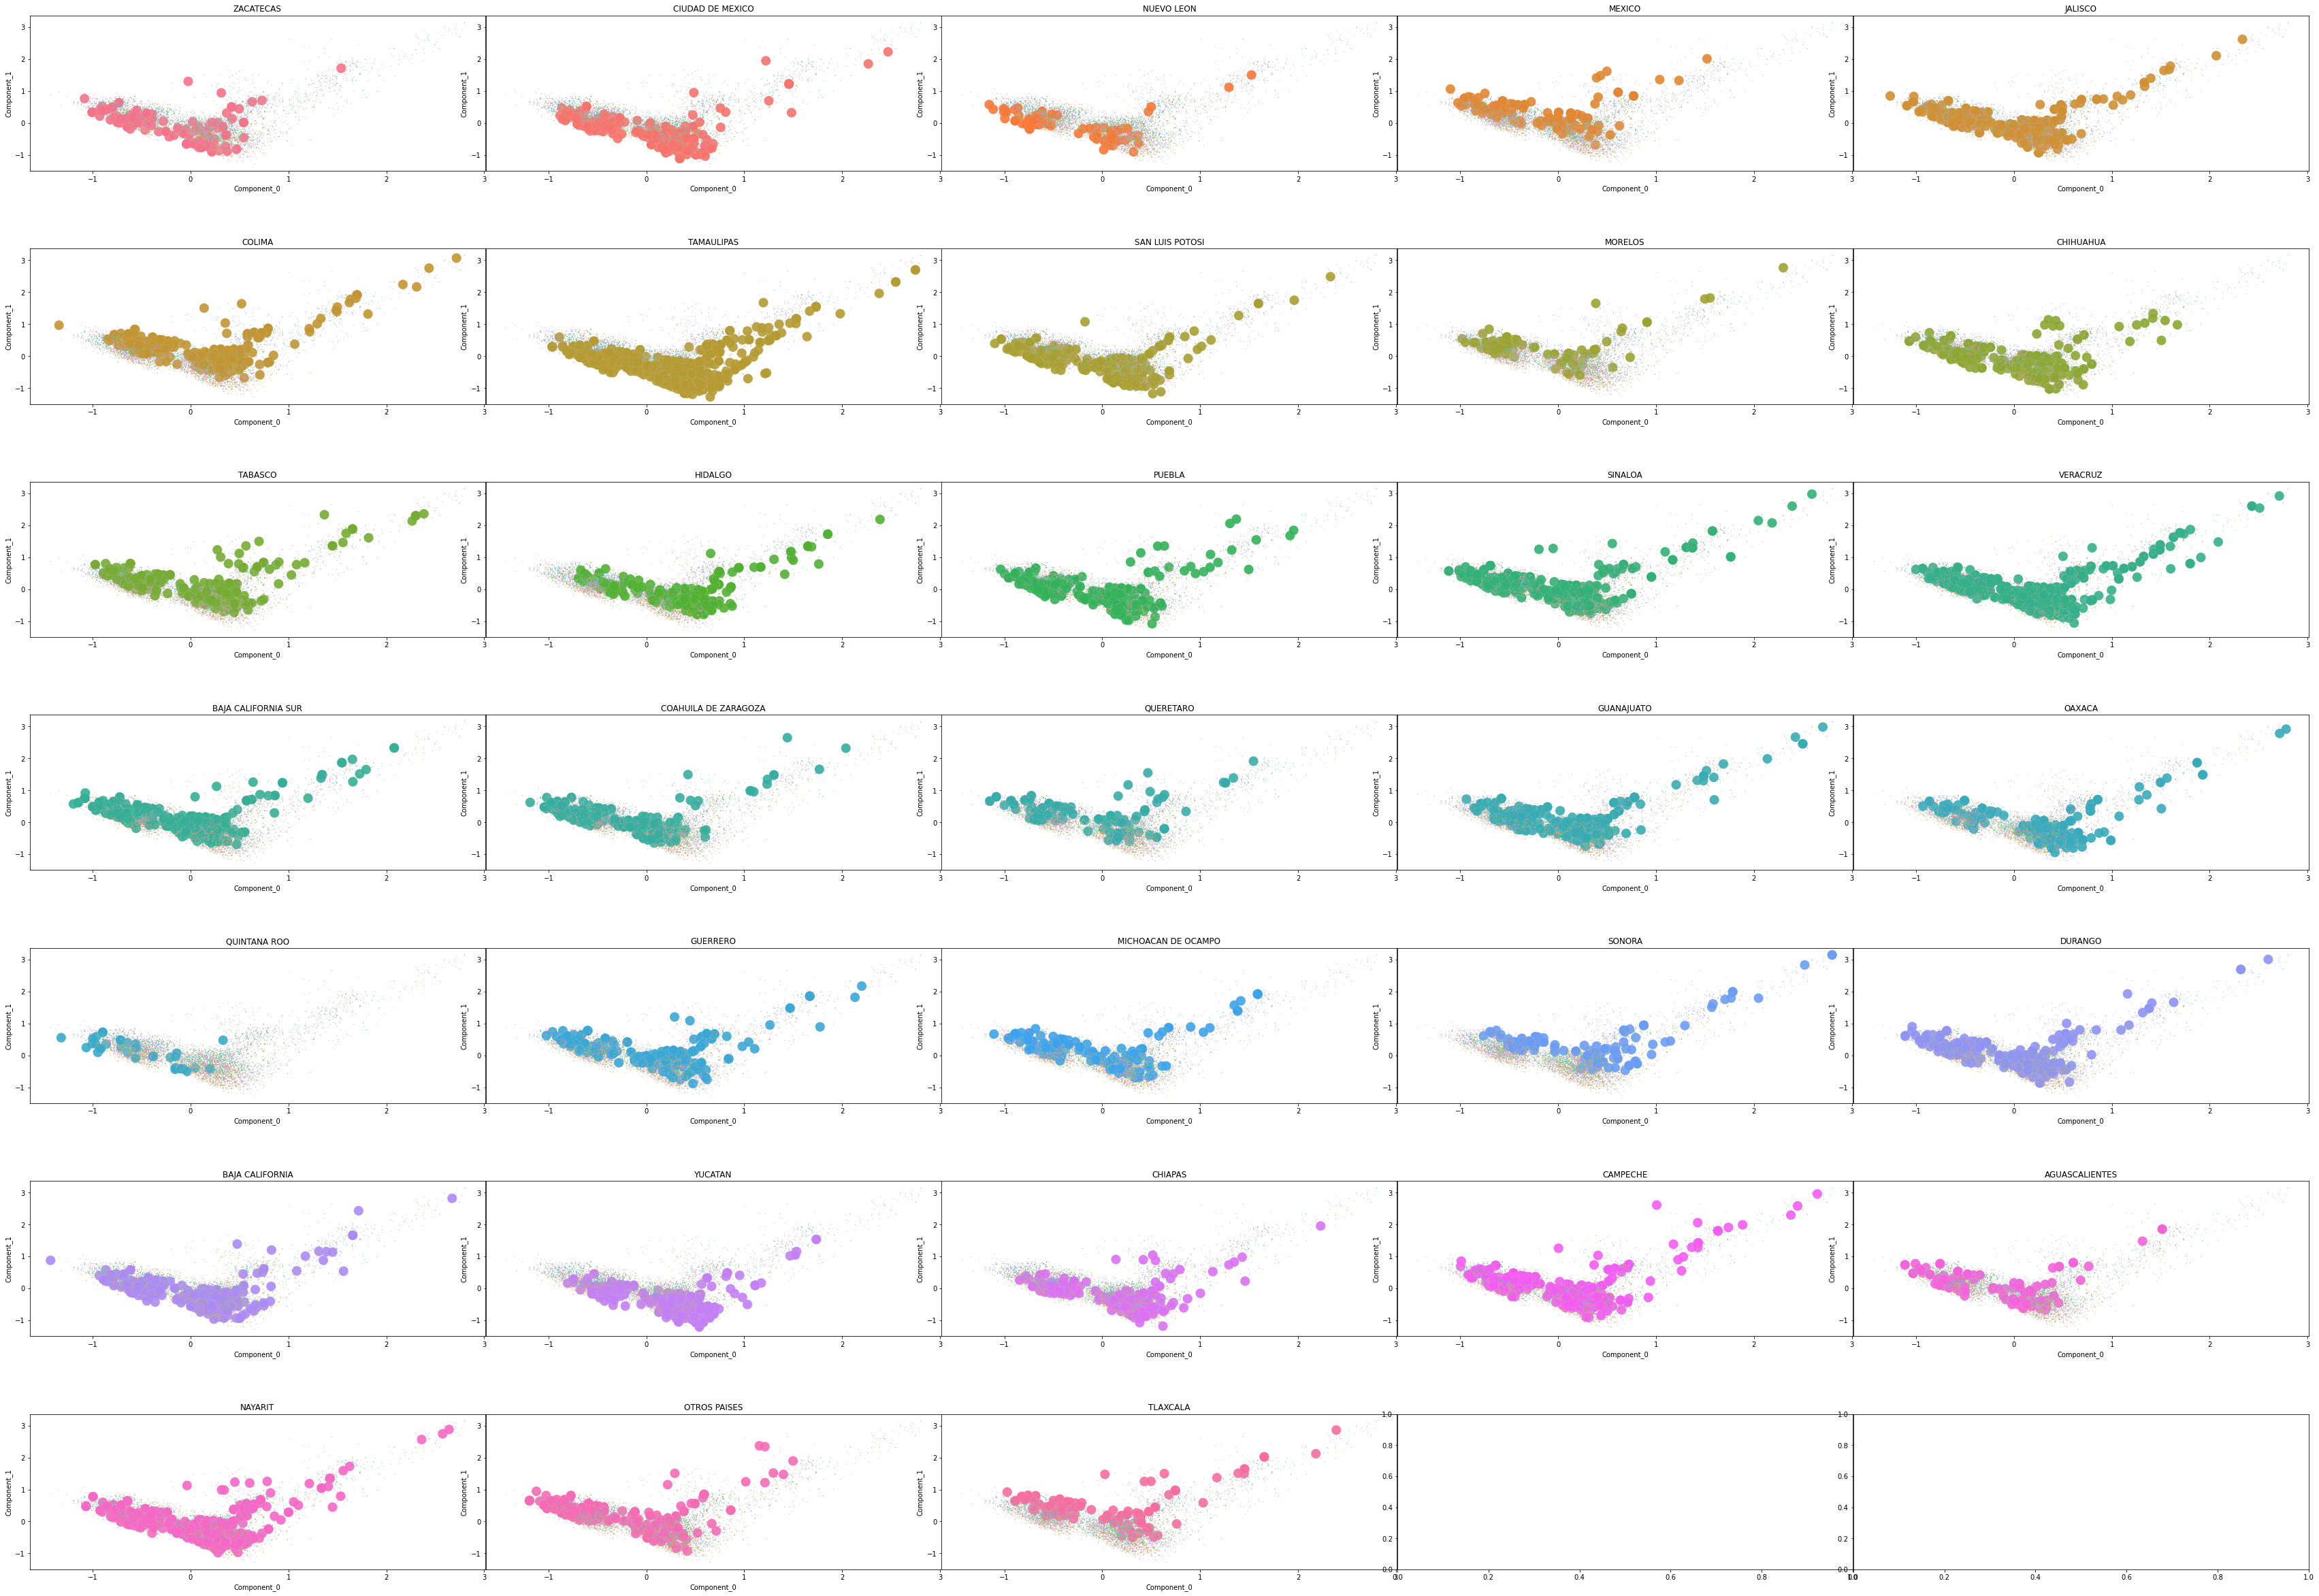

In [69]:
color_points(asd, col='Event State')

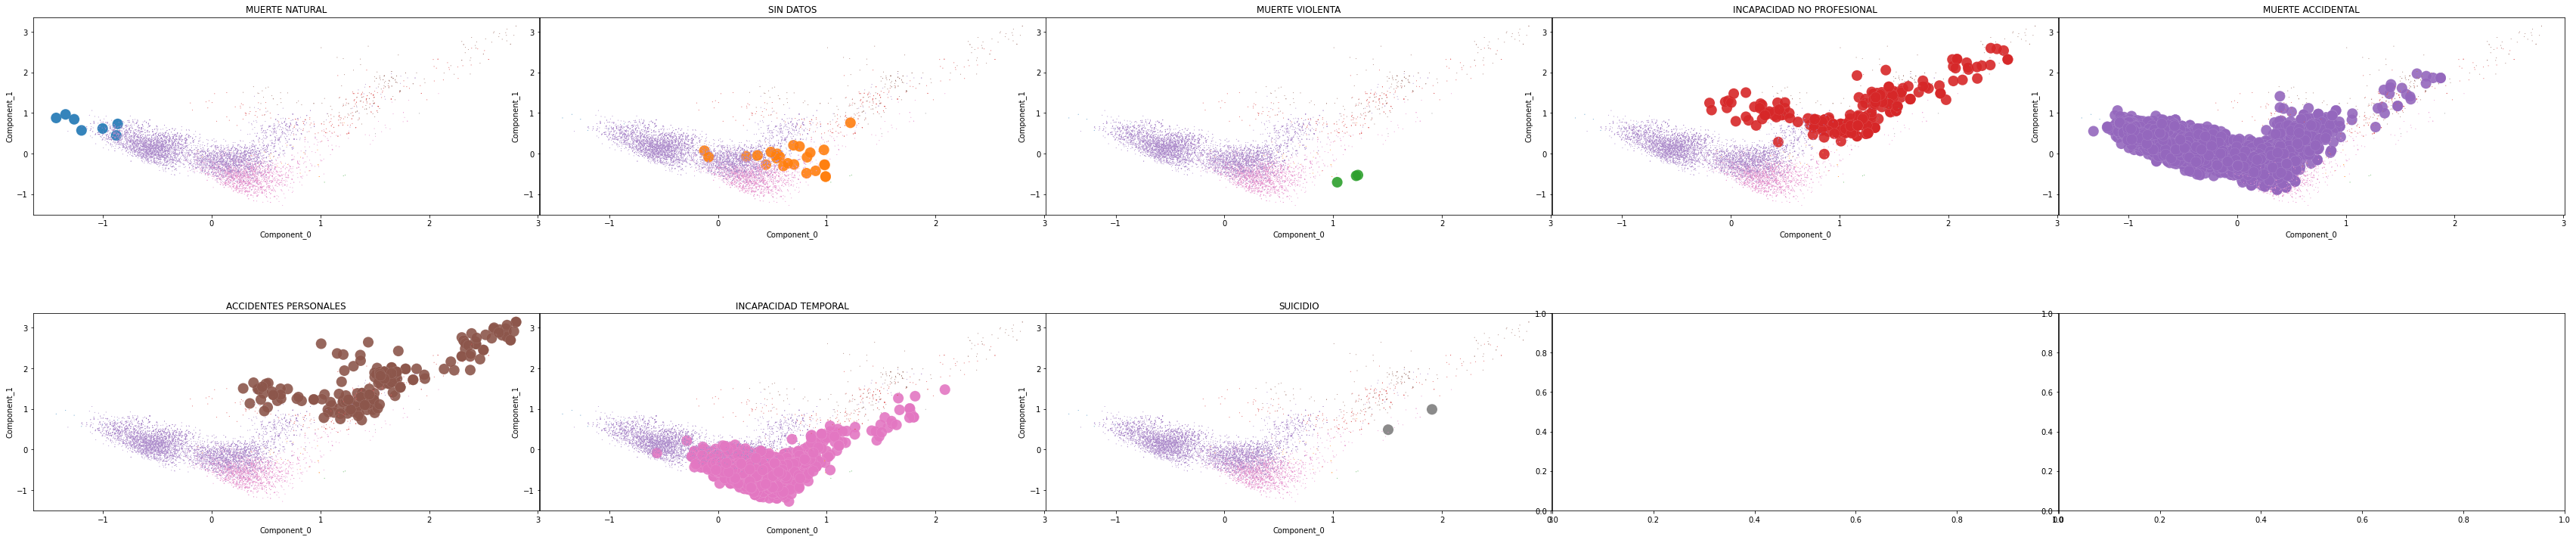

In [68]:
color_points(asd, col='Event Origin')

# Clasificadores sobre la data

In [71]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(components)
# kmeans.labels_
# kmeans.cluster_centers_

In [72]:
len(kmeans.labels_)

10534

Text(0.5, 1.0, 'Cantidad de muestras por cluster K means')

Text(0.5, 0, 'Clusters')

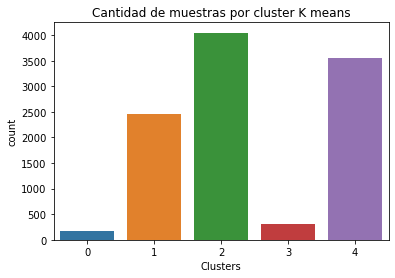

In [73]:
# Contamos cuantas muestras quedaron en cada cluster
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

In [74]:
s = pd.Series(kmeans.labels_)
s.index = asd.index
s.name = 'clusters'

In [75]:
asd = asd.merge(s, right_index=True, left_index=True)

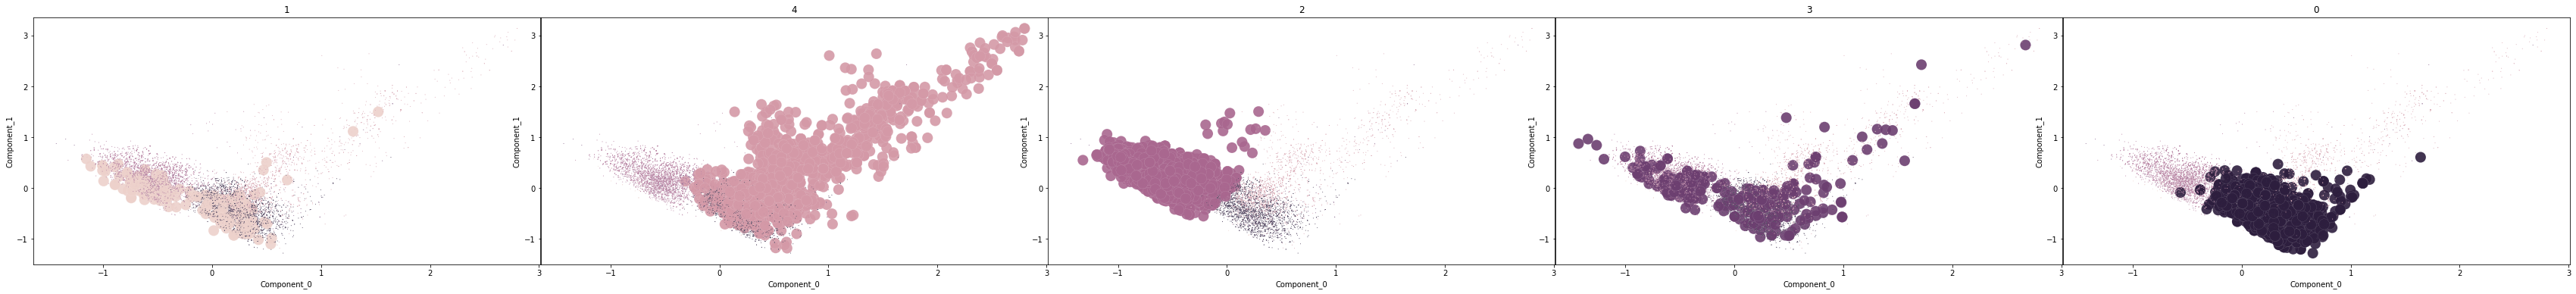

In [76]:
color_points(asd, 'clusters')

In [77]:
asd.columns

Index(['Active Situation', 'Event State', 'Gender', 'Event Motive',
       'Event Origin', 'Grupos_Etarios', 'Component_0', 'Component_1',
       'Component_2', 'Component_3', 'Component_4', 'Component_5',
       'Component_6', 'Component_7', 'Component_8', 'Component_9',
       'Component_10', 'Component_11', 'Component_12', 'Component_13',
       'Component_14', 'Component_15', 'Component_16', 'Component_17',
       'Component_18', 'Component_19', 'Component_20', 'Component_21',
       'Component_22', 'Component_23', 'Component_24', 'Component_25',
       'Component_26', 'Component_27', 'Component_28', 'Component_29',
       'Component_30', 'Component_31', 'Component_32', 'Component_33',
       'Component_34', 'Component_35', 'Component_36', 'Component_37',
       'Component_38', 'Component_39', 'Component_40', 'Component_41',
       'Component_42', 'Component_43', 'Component_44', 'Component_45',
       'Component_46', 'Component_47', 'Component_48', 'Component_49',
       'Component

In [78]:
fallecimientos_2018['Event Origin'].value_counts()

MUERTE NATURAL                7764
SIN DATOS                     2303
MUERTE ACCIDENTAL              224
MUERTE VIOLENTA                206
INCAPACIDAD NO PROFESIONAL      25
ACCIDENTES PERSONALES            7
INCAPACIDAD TEMPORAL             3
SUICIDIO                         2
Name: Event Origin, dtype: int64

In [79]:
fallecimientos_2018['Event Origin'].value_counts()

MUERTE NATURAL                7764
SIN DATOS                     2303
MUERTE ACCIDENTAL              224
MUERTE VIOLENTA                206
INCAPACIDAD NO PROFESIONAL      25
ACCIDENTES PERSONALES            7
INCAPACIDAD TEMPORAL             3
SUICIDIO                         2
Name: Event Origin, dtype: int64

In [80]:
asd[asd['clusters'] == 0].loc[:, :"Component_0"]

Active Situation          Event State     Gender  \
22            INACTIVO           TAMAULIPAS   FEMENINO   
27            INACTIVO  BAJA CALIFORNIA SUR  MASCULINO   
99            INACTIVO  BAJA CALIFORNIA SUR   FEMENINO   
165             ACTIVO     CIUDAD DE MEXICO  MASCULINO   
206           INACTIVO  BAJA CALIFORNIA SUR   FEMENINO   
...                ...                  ...        ...   
9961          INACTIVO             GUERRERO   FEMENINO   
10001           ACTIVO  BAJA CALIFORNIA SUR  MASCULINO   
10027         INACTIVO  BAJA CALIFORNIA SUR  MASCULINO   
10192           ACTIVO  BAJA CALIFORNIA SUR  MASCULINO   
10436           ACTIVO  MICHOACAN DE OCAMPO   FEMENINO   

                           Event Motive    Event Origin Grupos_Etarios  \
22              TUMOR MALIGNO DEL COLON  MUERTE NATURAL          66-70   
27                       Other_diseases  MUERTE NATURAL          76-80   
99          INFARTO AGUDO DEL MIOCARDIO  MUERTE NATURAL          71-75   
165             TUMOR MALIGNO DEL COLON  MUERTE NATURAL          71-75   
206                   PARO RESPIRATORIO  MUERTE NATURAL     81 or more   
...                                 ...             ...            ...   
9961            TUMOR MALIGNO DEL COLON  MUERTE NATURAL          66-70   
10001  INSUFICIENCIA RESPIRATORIA AGUDA       SIN DATOS          66-70   
10027       INSUFICIENCIA RENAL CRONICA  MUERTE NATURAL          66-70   
10192                 OTRAS SEPTICEMIAS  MUERTE NATURAL          51-55   
10436           TUMOR MALIGNO DEL COLON  MUERTE NATURAL          56-60   

       Component_0  
22       -0.555205  
27       -0.614250  
99       -0.817360  
165       0.054999  
206      -1.113591  
...            ...  
9961     -0.335247  
10001     0.098810  
10027    -0.706379  
10192     0.101579  
10436    -0.045054  

[180 rows x 7 columns]

<Figure size 864x432 with 0 Axes>

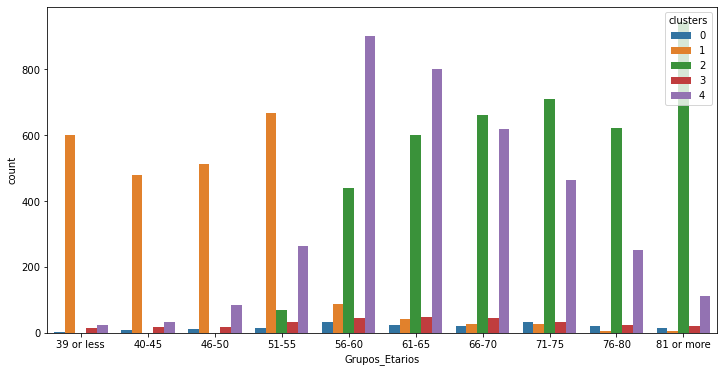

In [81]:
plt.figure(figsize=(12, 6))
# sns.countplot(x="clusters", hue="Grupos_Etarios", data=asd)
sns.countplot(x="Grupos_Etarios", hue="clusters", data=asd)

1. cluster 1: < 50 años
2. cluster 2: distribuido > 56 años
3. cluster 4: concentrado 55 < x < 80
4. cluster 3 y 0 ??

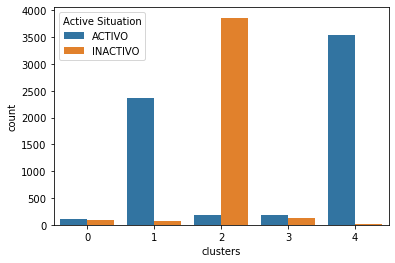

In [82]:
sns.countplot(x="clusters", hue="Active Situation", data=asd)

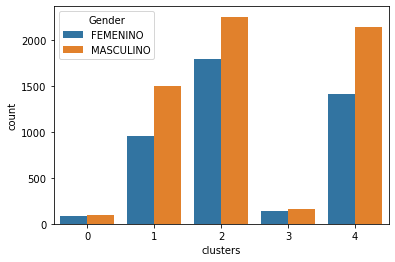

In [83]:
sns.countplot(x="clusters", hue="Gender", data=asd)

<Figure size 432x1296 with 0 Axes>

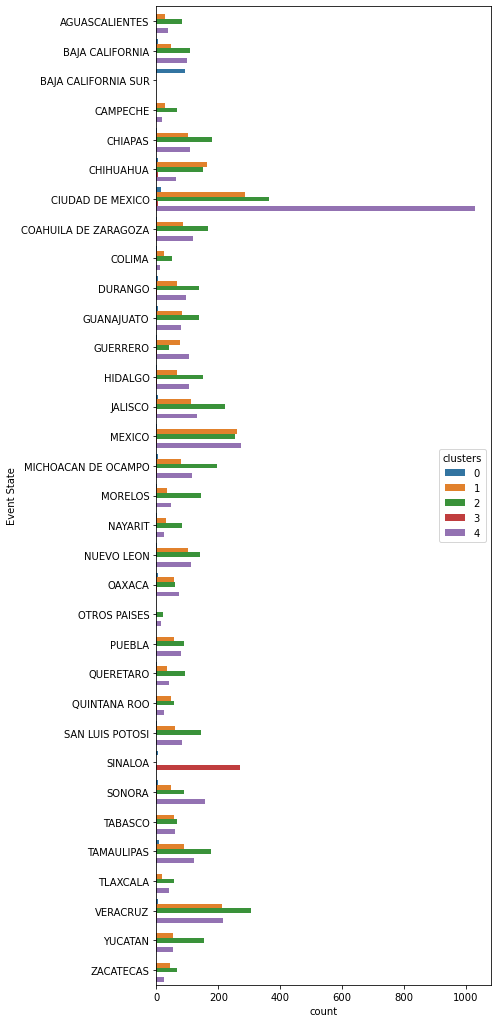

In [84]:
plt.figure(figsize=(6, 18))
sns.countplot(y="Event State", hue="clusters", data=asd)

In [85]:
a = pd.concat([asd.loc[:, "Component_0":"Component_5"], asd["clusters"]], axis=1)

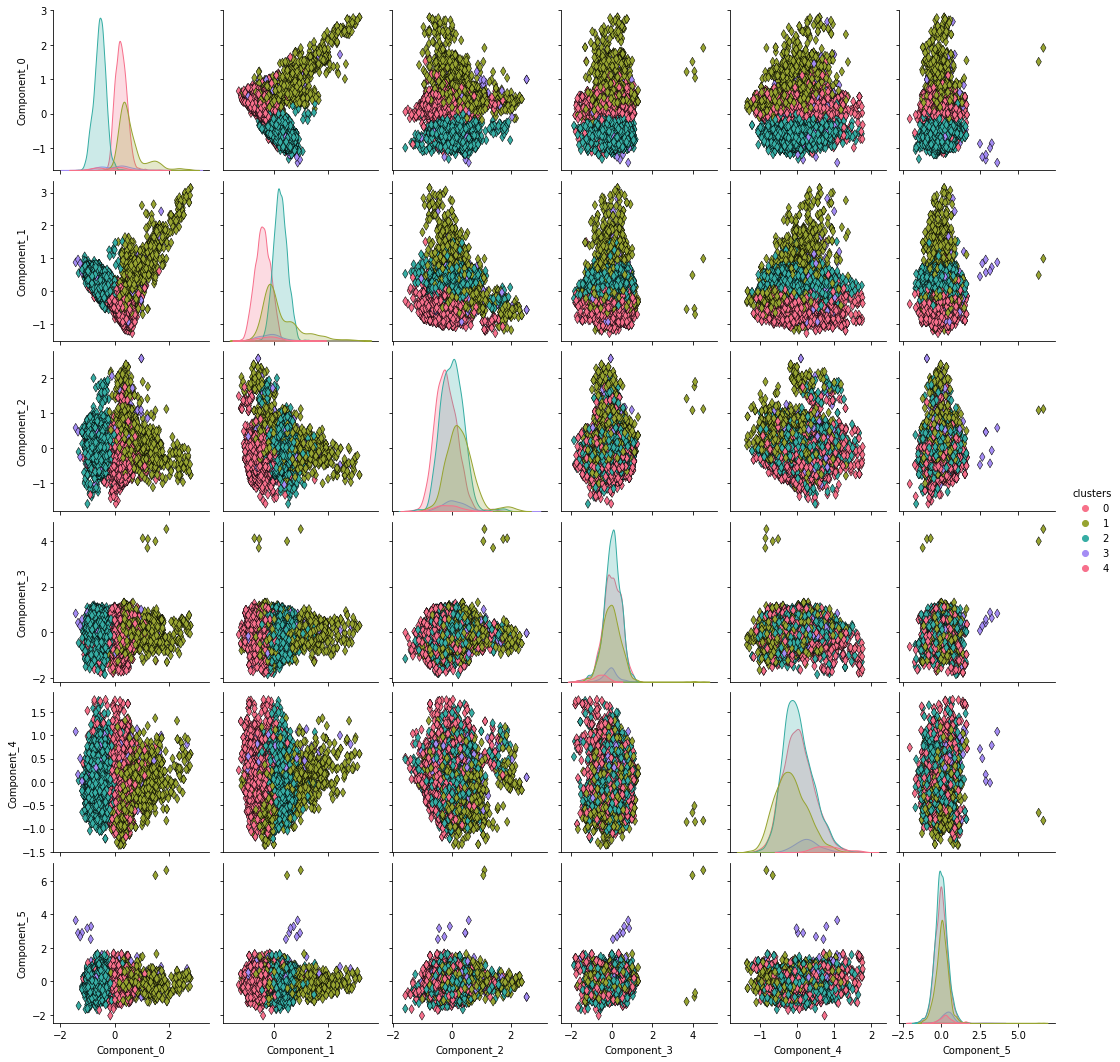

In [86]:
g = sns.pairplot(a,hue='clusters', palette='husl', markers='d', size=2.5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })